In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
data = pd.read_csv("data/TurbineGroup2.csv")

data.info()
data.describe()
data.isna().sum()
data.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14310 entries, 0 to 14309
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      14310 non-null  float64
 1   AP      14310 non-null  float64
 2   AH      14310 non-null  float64
 3   AFDP    14310 non-null  float64
 4   GTEP    14310 non-null  float64
 5   TIT     14310 non-null  float64
 6   TAT     14310 non-null  float64
 7   TEY     14310 non-null  float64
 8   CDP     14310 non-null  float64
 9   CO      14310 non-null  float64
 10  NOX     14310 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


np.int64(7)

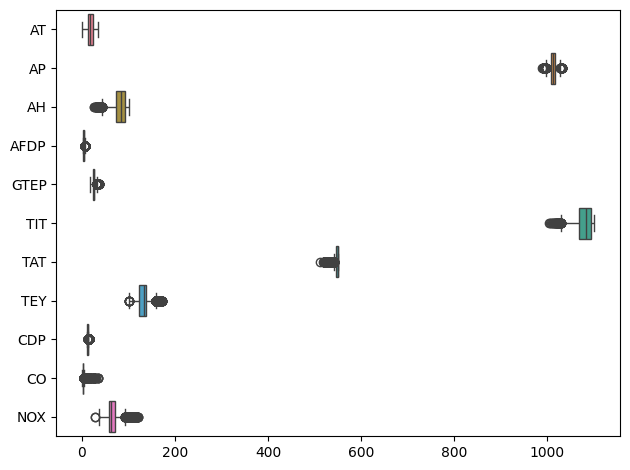

In [4]:
numeric = data.select_dtypes(include=np.number)
sns.boxplot(data=numeric, orient="h")
plt.tight_layout()
plt.show()


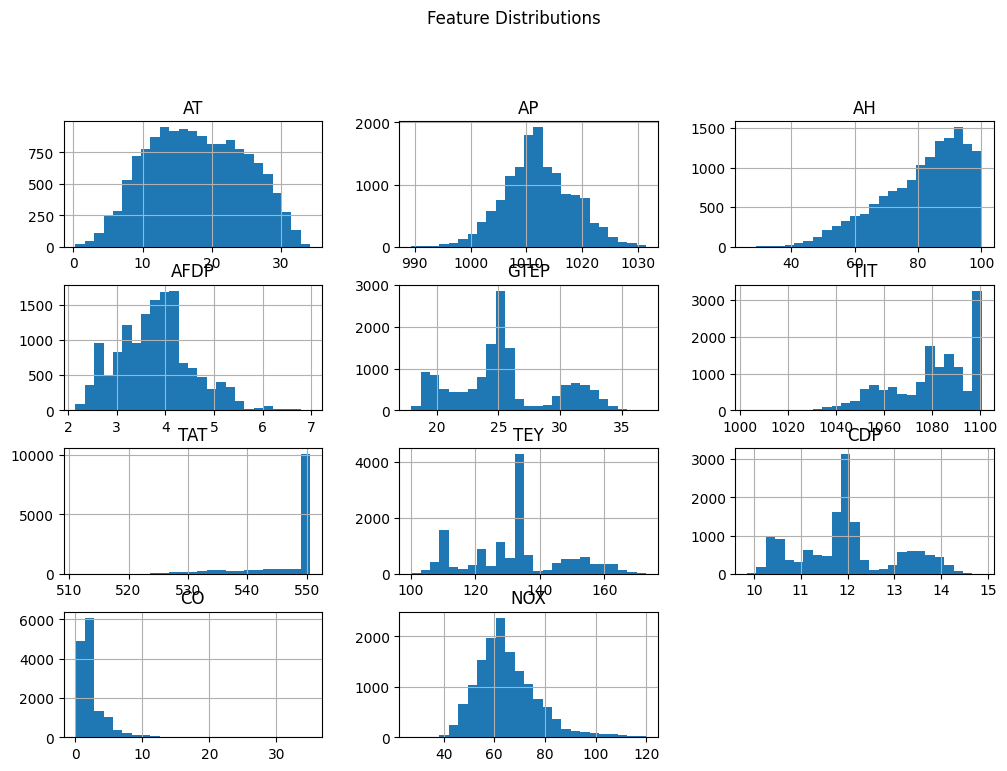

In [5]:
numeric.hist(figsize=(12,8), bins=25)
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


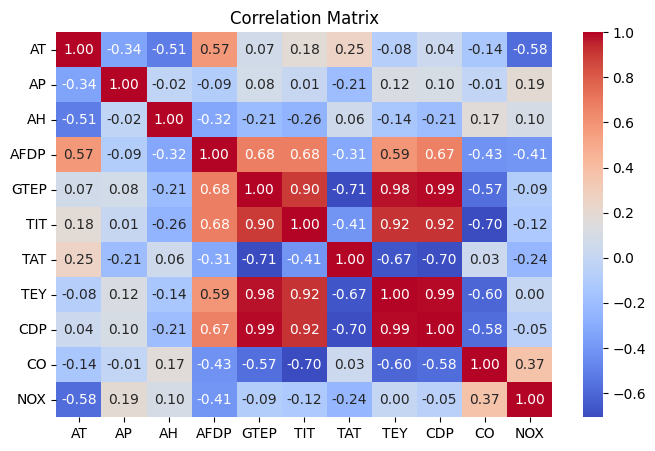

In [9]:
corr = numeric.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


<Figure size 800x500 with 0 Axes>

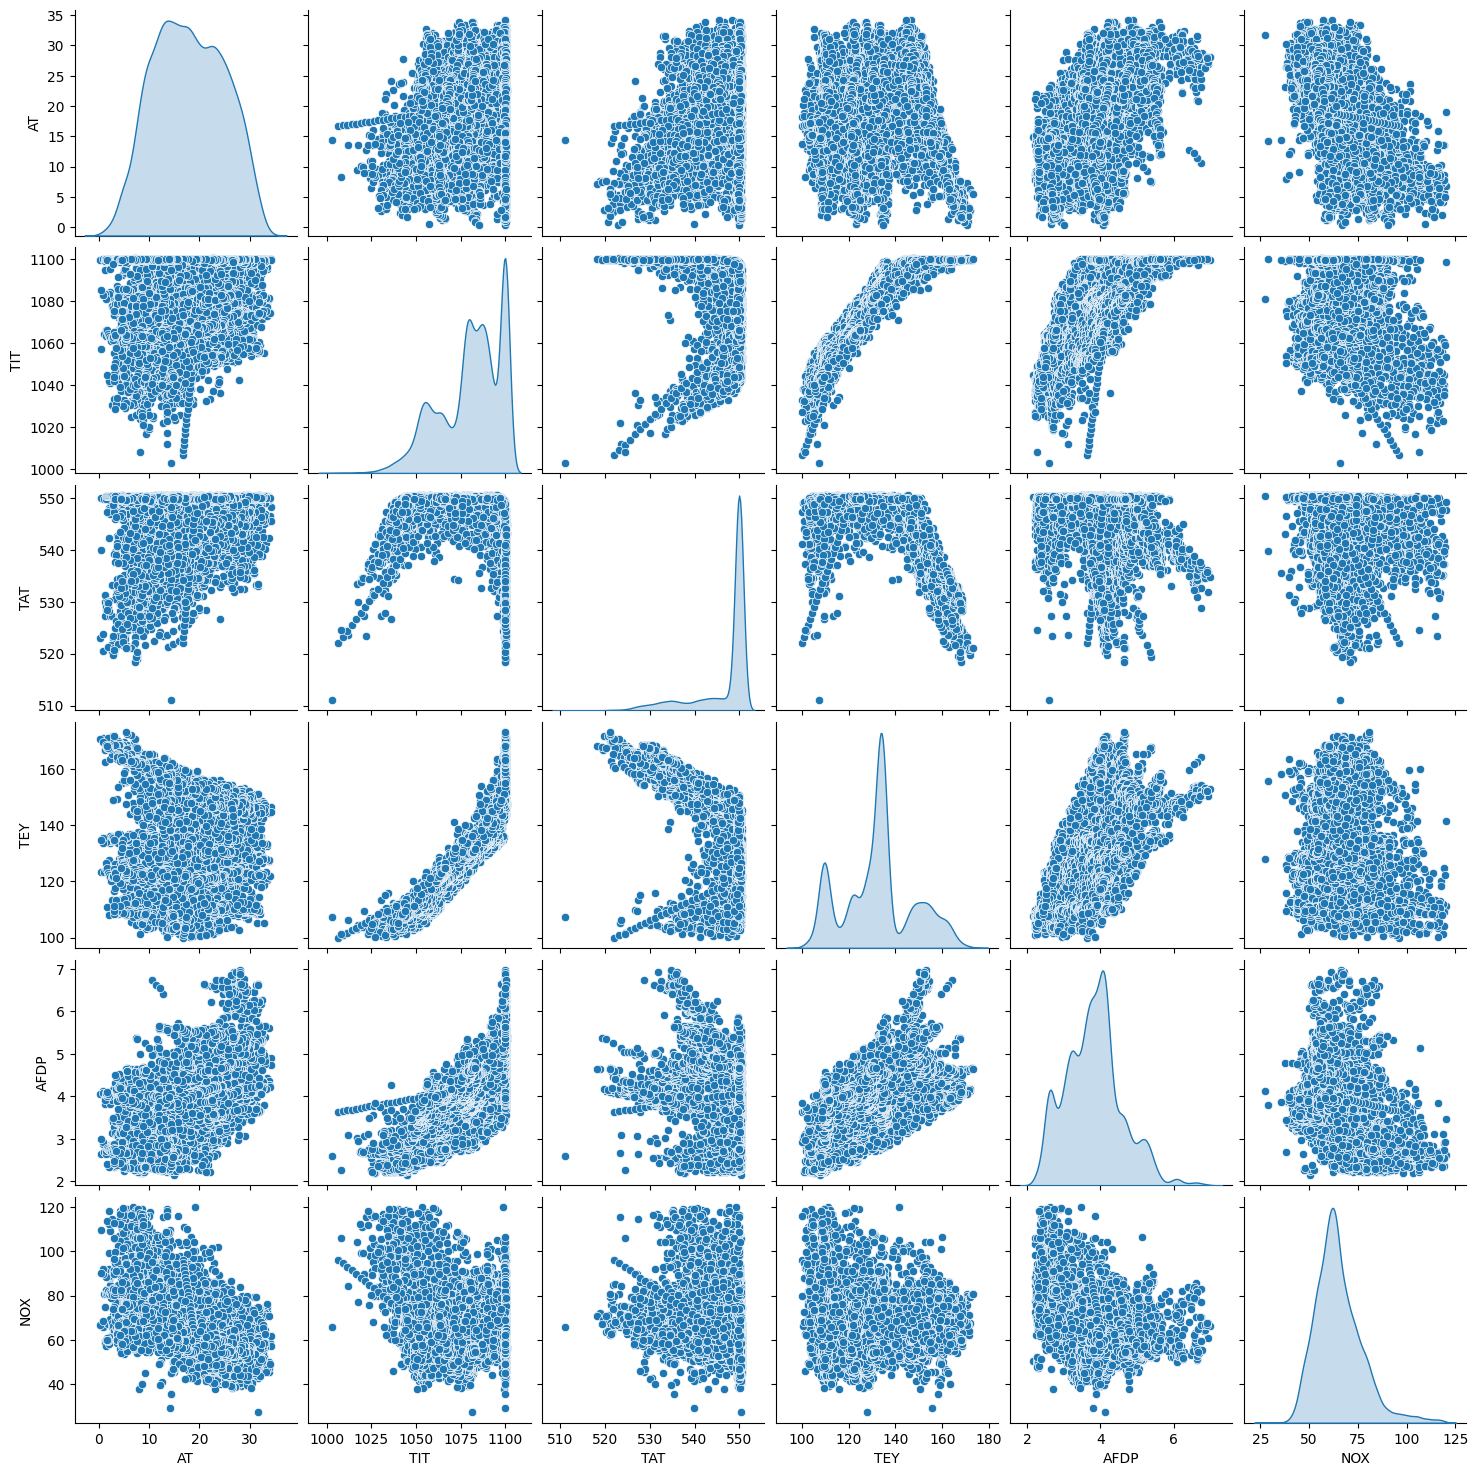

In [10]:
plt.figure(figsize=(8,5))
sns.pairplot(data, vars=["AT","TIT","TAT","TEY","AFDP","NOX"], diag_kind="kde")
plt.show()


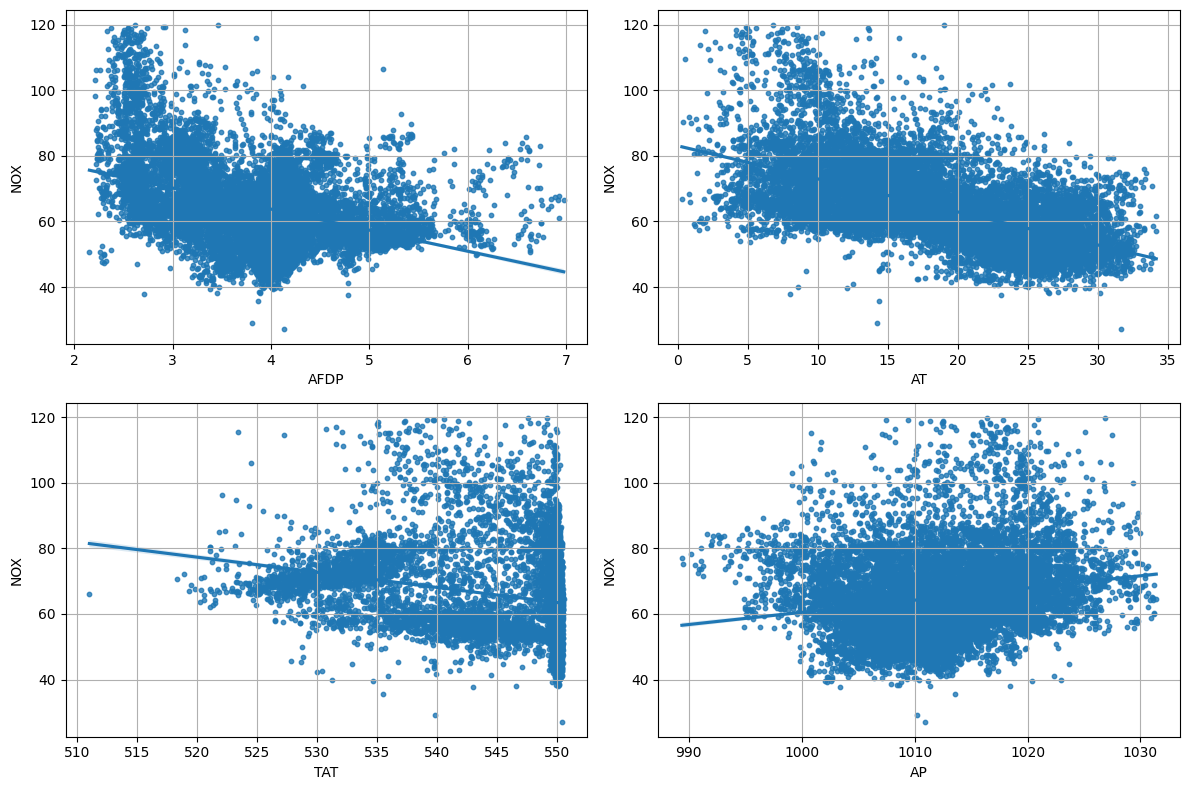

In [11]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
sns.regplot(x="AFDP", y="NOX", data=data, ax=axs[0,0], scatter_kws={'s':10})
sns.regplot(x="AT",   y="NOX", data=data, ax=axs[0,1], scatter_kws={'s':10})
sns.regplot(x="TAT",  y="NOX", data=data, ax=axs[1,0], scatter_kws={'s':10})
sns.regplot(x="AP",   y="NOX", data=data, ax=axs[1,1], scatter_kws={'s':10})
for ax in axs.flat: ax.grid(True)
plt.tight_layout()
plt.show()


In [30]:
low_band   = data[(data["TEY"] >= 130) & (data["TEY"] <= 136)]
high_band  = data[data["TEY"] >= 160]


In [31]:
for label, subset in {"Low (130–136 MW)":low_band, "High (≥160 MW)":high_band}.items():
    corr = subset[["NOX","AFDP","AT","TAT","AP"]].corr()["NOX"].drop("NOX")
    print(f"\n{label} correlation with NOX:\n{corr.round(2)}")



Low (130–136 MW) correlation with NOX:
AFDP   -0.43
AT     -0.33
TAT    -0.02
AP      0.07
Name: NOX, dtype: float64

High (≥160 MW) correlation with NOX:
AFDP    0.61
AT      0.26
TAT     0.16
AP      0.05
Name: NOX, dtype: float64


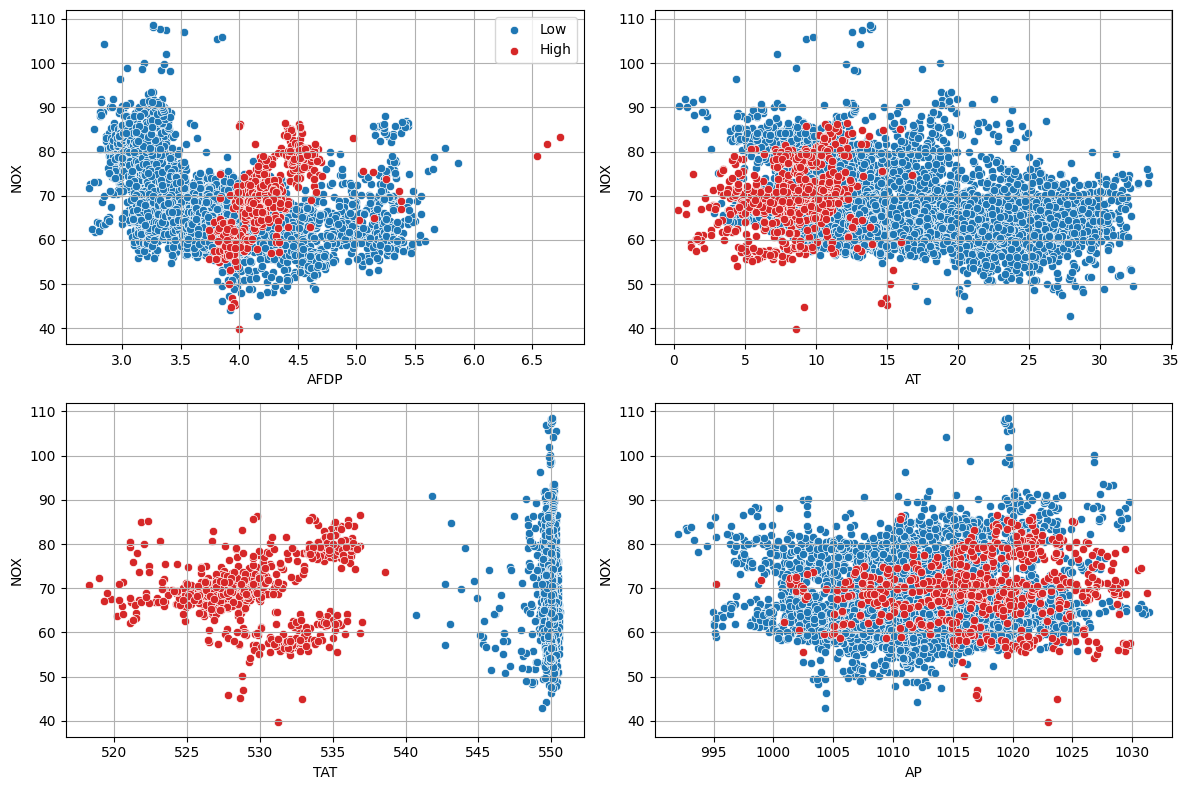

In [32]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
sns.scatterplot(x="AFDP", y="NOX", data=low_band, ax=axs[0,0], color="tab:blue", label="Low")
sns.scatterplot(x="AFDP", y="NOX", data=high_band, ax=axs[0,0], color="tab:red", label="High")
sns.scatterplot(x="AT",   y="NOX", data=low_band, ax=axs[0,1], color="tab:blue")
sns.scatterplot(x="AT",   y="NOX", data=high_band, ax=axs[0,1], color="tab:red")
sns.scatterplot(x="TAT",  y="NOX", data=low_band, ax=axs[1,0], color="tab:blue")
sns.scatterplot(x="TAT",  y="NOX", data=high_band, ax=axs[1,0], color="tab:red")
sns.scatterplot(x="AP",   y="NOX", data=low_band, ax=axs[1,1], color="tab:blue")
sns.scatterplot(x="AP",   y="NOX", data=high_band, ax=axs[1,1], color="tab:red")
for ax in axs.flat: ax.grid(True)
plt.tight_layout()
plt.show()


In [33]:
low_band  = data[(data["TEY"] >= 130) & (data["TEY"] <= 136)]
high_band = data[data["TEY"] >= 160]


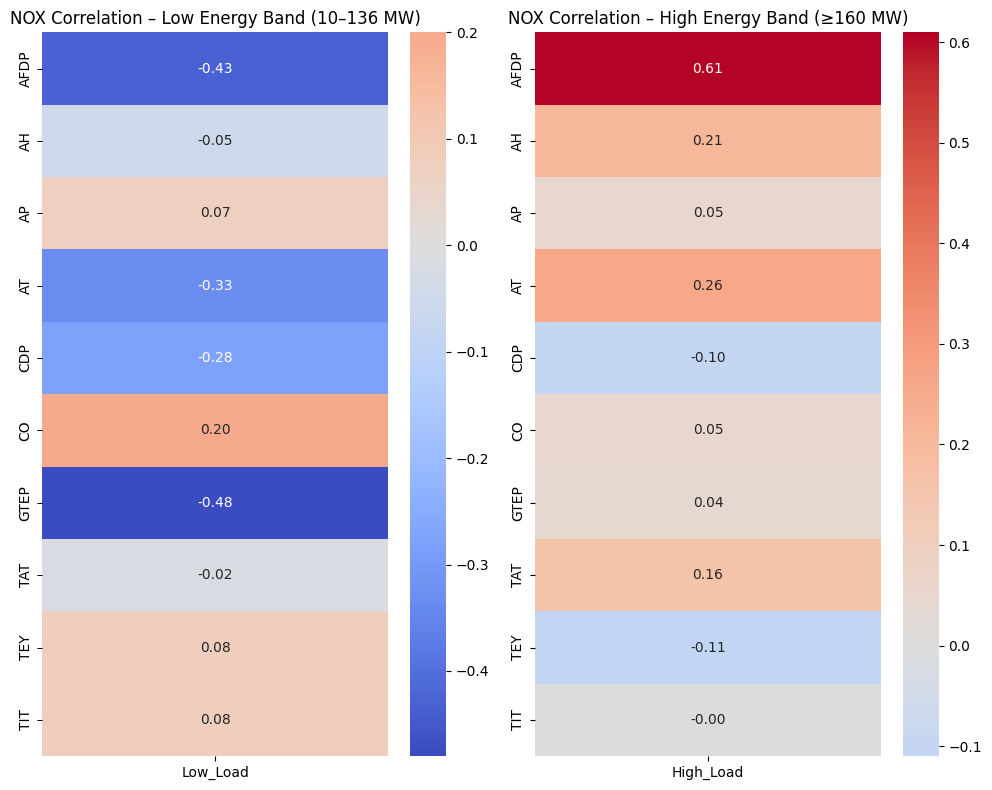

      Low_Load  High_Load
CO        0.20       0.05
TEY       0.08      -0.11
TIT       0.08      -0.00
AP        0.07       0.05
TAT      -0.02       0.16
AH       -0.05       0.21
CDP      -0.28      -0.10
AT       -0.33       0.26
AFDP     -0.43       0.61
GTEP     -0.48       0.04


In [34]:
import matplotlib.pyplot as plt, seaborn as sns
import pandas as pd

# numeric only
low_num  = low_band.select_dtypes(include="number")
high_num = high_band.select_dtypes(include="number")

# compute correlation with NOX only
corr_low  = low_num.corr().loc[["NOX"]].T.sort_values("NOX", ascending=False)
corr_high = high_num.corr().loc[["NOX"]].T.sort_values("NOX", ascending=False)

# rename for clarity
corr_low.rename(columns={"NOX":"Low_Load"}, inplace=True)
corr_high.rename(columns={"NOX":"High_Load"}, inplace=True)

# merge
corr_compare = corr_low.join(corr_high, how="outer").drop("NOX", errors="ignore").round(2)

# plot heatmaps
fig, axs = plt.subplots(1,2,figsize=(10,8))

sns.heatmap(corr_compare[["Low_Load"]],  annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=axs[0])
axs[0].set_title("NOX Correlation – Low Energy Band (10–136 MW)")

sns.heatmap(corr_compare[["High_Load"]], annot=True, fmt=".2f", cmap="coolwarm", center=0, ax=axs[1])
axs[1].set_title("NOX Correlation – High Energy Band (≥160 MW)")

plt.tight_layout()
plt.show()

# optional: print table for report
print(corr_compare.sort_values("Low_Load", ascending=False))


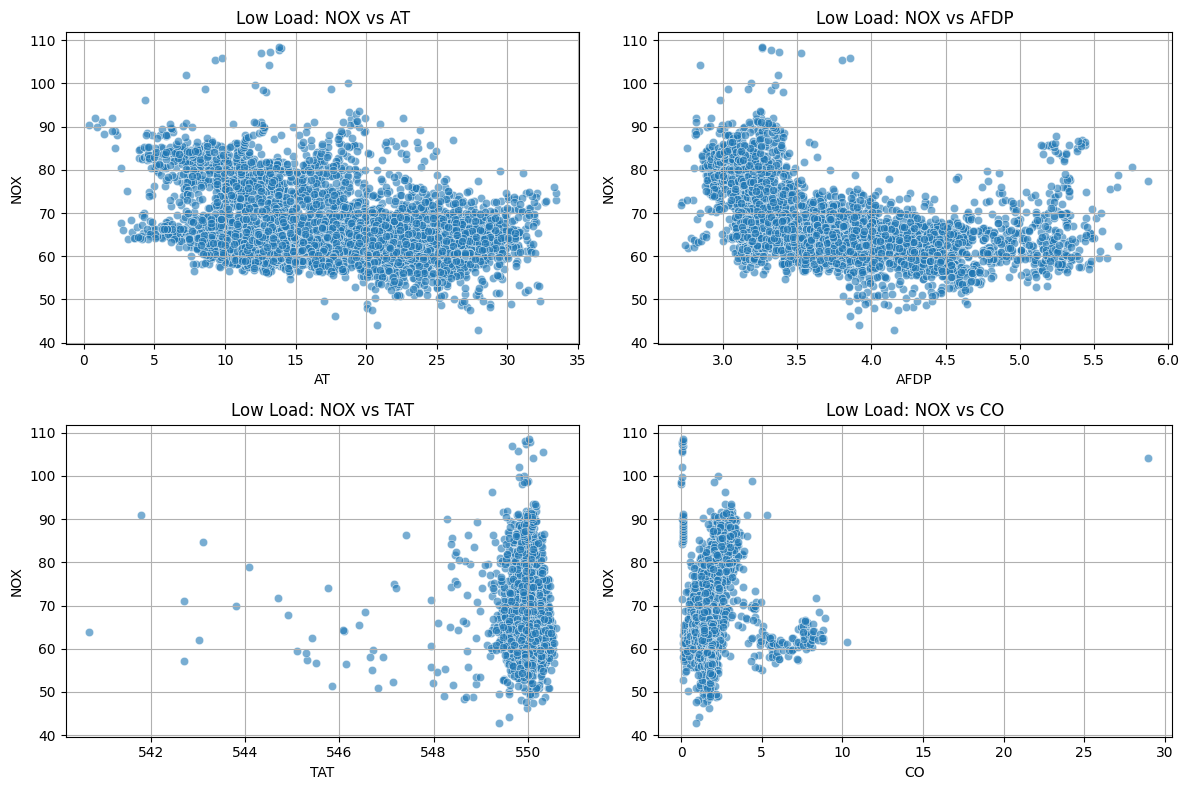

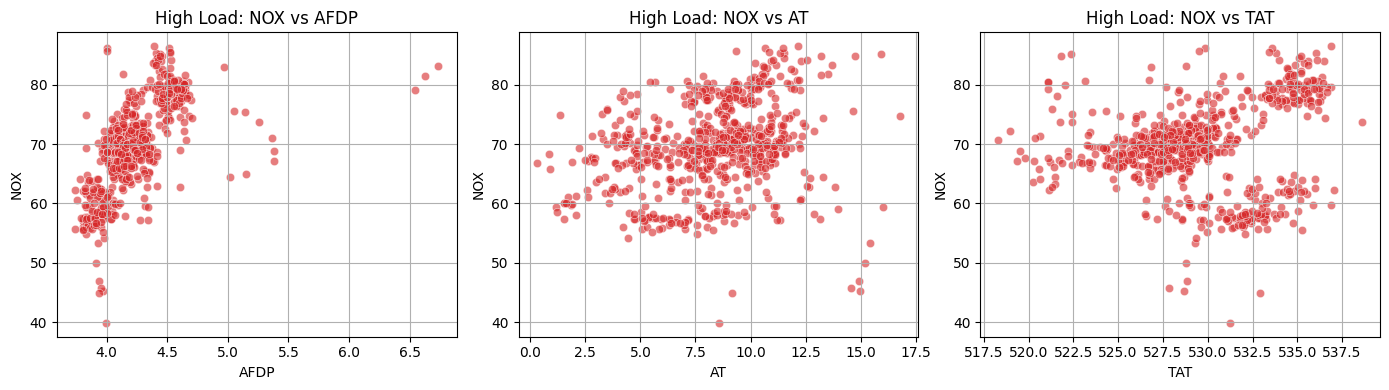

In [35]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# --- Low load ---
low_vars = ["AT","AFDP","TAT","CO"]
for i, col in enumerate(low_vars):
    sns.scatterplot(x=col, y="NOX", data=low_band, ax=axs[i//2, i%2], color="tab:blue", alpha=0.6)
    axs[i//2, i%2].set_title(f"Low Load: NOX vs {col}")
    axs[i//2, i%2].grid(True)

plt.tight_layout()
plt.show()

# --- High load ---
fig, axs = plt.subplots(1,3,figsize=(14,4))
high_vars = ["AFDP","AT","TAT"]
for i, col in enumerate(high_vars):
    sns.scatterplot(x=col, y="NOX", data=high_band, ax=axs[i], color="tab:red", alpha=0.6)
    axs[i].set_title(f"High Load: NOX vs {col}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()


**Summary for client meeting (non-technical):**

---

### 1. Key finding

NOx emissions depend mainly on **air intake quality, combustion temperature, and turbine load**.
Their influence changes with the turbine’s operating band.

---

### 2. What affects NOx

| **Operating Band**         | **Main Factors**                              | **Effect on NOx**          | **Why it happens**                                                      |
| -------------------------- | --------------------------------------------- | -------------------------- | ----------------------------------------------------------------------- |
| **Low Energy (10–136 MW)** | **Ambient Temperature (AT)** ↓                | Cooler air → NOx ↑         | Cold, dense air has more oxygen, raising flame temperature.             |
|                            | **Air Filter Differential Pressure (AFDP)** ↓ | Clean filter → NOx ↑       | Easier airflow increases combustion intensity.                          |
|                            | **Exhaust Temperature (TAT)** ↓               | Lower exhaust temp → NOx ↓ | Cooler combustion produces fewer NOx molecules.                         |
|                            | **Carbon Monoxide (CO)** ↑                    | NOx ↑                      | Indicates incomplete burn; bad air-fuel balance raises both CO and NOx. |
| **High Energy (≥160 MW)**  | **AFDP** ↑                                    | NOx ↑                      | Clogged filters reduce mixing, create local hot zones.                  |
|                            | **AT & TAT** ↑                                | NOx ↑                      | Hotter inlet/exhaust temperatures drive thermal NOx formation.          |

---

### 3. Factors outside control

* **Ambient Temperature (AT)** and **Ambient Pressure (AP)** depend on weather.
* Seasonal humidity variations also not controllable but should be recorded.

---

### 4. Controllable or actionable factors

* **AFDP:** monitor and replace air filters earlier; fouling has clear emission impact at high load.
* **Combustion tuning:** verify temperature limits and fuel-air calibration to keep TAT within design band.
* **Load scheduling:** avoid long operation at intermediate ranges if emissions spike there.
* **Maintenance logging:** tie NOx peaks to cleaning or filter-change events to quantify improvement.

---

### 5. Follow-up questions for deeper analysis

1. **Filter data:** how often are filters changed or cleaned? Can we align NOx spikes with those dates?
2. **Fuel quality:** any change in fuel composition or calorific value during measurement period?
3. **Sensor calibration:** are AFDP and TAT sensors routinely validated?
4. **Ambient data:** can we obtain hourly weather logs (humidity, wind direction, temperature) from site to isolate external effects?
5. **Control settings:** does turbine controller alter combustion mode by load (e.g., DLN mode switching)?
6. **Operational goals:** is NOx compliance or efficiency the higher priority—so optimization can target the right trade-off?

---

### 6. Consultant takeaway

* **Low-load emissions** are **air-intake-driven** — keep the air clean and track ambient effects.
* **High-load emissions** are **heat-driven** — control temperature and mixing.
  With these insights, future steps include time-based modeling, predictive maintenance for filters, and simulation of load-temperature trade-offs to reduce NOx without major hardware change.


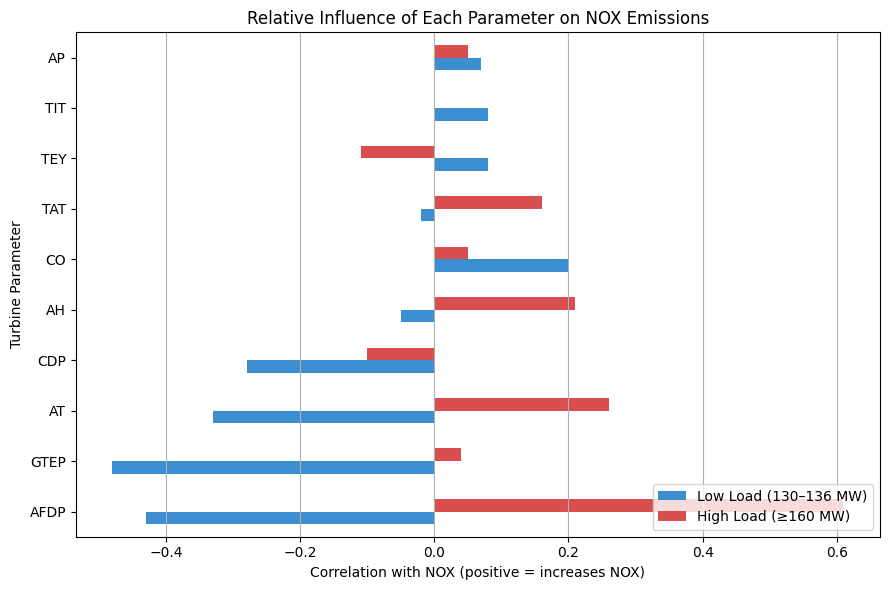

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# correlations already computed earlier
corr_low  = low_band.select_dtypes("number").corr()["NOX"].drop("NOX")
corr_high = high_band.select_dtypes("number").corr()["NOX"].drop("NOX")

# make dataframe for plotting
corr_df = pd.DataFrame({
    "Low Load (130–136 MW)": corr_low,
    "High Load (≥160 MW)": corr_high
}).round(2)

# keep only top variables by absolute correlation
corr_df = corr_df.reindex(corr_df.abs().max(axis=1).sort_values(ascending=False).index)

# plot
corr_df.plot(kind="barh", figsize=(9,6), color=["#3b8ed0","#d94f4f"])
plt.title("Relative Influence of Each Parameter on NOX Emissions")
plt.xlabel("Correlation with NOX (positive = increases NOX)")
plt.ylabel("Turbine Parameter")
plt.grid(True, axis="x")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_15618/1032767297.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_low[top_low], y=top_low, palette="Blues_r", ax=axs[0])
/var/folders/n5/50bl5l7j7nx717mns6lylg800000gn/T/ipykernel_15618/1032767297.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_high[top_high], y=top_high, palette="Reds_r", ax=axs[1])


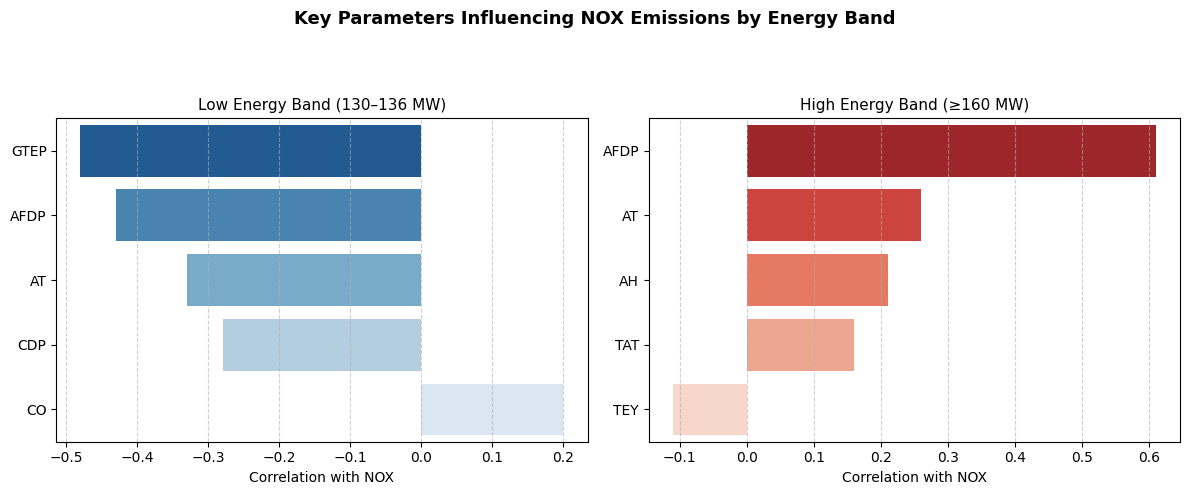

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Corrected data splits ---
low_band  = data[(data["TEY"] >= 130) & (data["TEY"] <= 136)]
high_band = data[data["TEY"] >= 160]

# --- Compute correlations ---
corr_low  = low_band.select_dtypes("number").corr()["NOX"].drop("NOX").round(2)
corr_high = high_band.select_dtypes("number").corr()["NOX"].drop("NOX").round(2)

# --- Select top correlated parameters (absolute values) ---
top_low  = corr_low.abs().sort_values(ascending=False).head(5).index
top_high = corr_high.abs().sort_values(ascending=False).head(5).index

# --- Plot setup: side by side, short height ---
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Key Parameters Influencing NOX Emissions by Energy Band", fontsize=13, fontweight="bold")

# --- Low Load (130–136 MW) ---
sns.barplot(x=corr_low[top_low], y=top_low, palette="Blues_r", ax=axs[0])
axs[0].set_title("Low Energy Band (130–136 MW)", fontsize=11)
axs[0].set_xlabel("Correlation with NOX")
axs[0].set_ylabel("")
axs[0].grid(axis="x", linestyle="--", alpha=0.6)

# --- High Load (≥160 MW) ---
sns.barplot(x=corr_high[top_high], y=top_high, palette="Reds_r", ax=axs[1])
axs[1].set_title("High Energy Band (≥160 MW)", fontsize=11)
axs[1].set_xlabel("Correlation with NOX")
axs[1].set_ylabel("")
axs[1].grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.show()
